In [ ]:
!pip install -Uqq fastai fastbook

In [ ]:
from fastcore.all import *
from fastbook import search_images_ddg

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return search_images_ddg(term, max_images)

In [ ]:
urls = search_images('rabbit oryctolagus', max_images=1)
urls[0]

In [ ]:
from fastdownload import download_url 
download_url(urls[0], 'rabbit.jpg', show_progress=False)

from fastai.vision.all import *
im = Image.open('rabbit.jpg')
im.to_thumb(256, 256)

In [ ]:
download_url(search_images('hare lepus', max_images=1)[0], 'hare.jpg', show_progress = False)
im = Image.open('hare.jpg')
im.to_thumb(256, 256)

In [ ]:
searches = 'rabbit oryctolagus', 'hare lepus'
path = Path('rabbit_or_hare')

from time import sleep
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok = True, parents= True)
    download_images(dest, urls=search_images(f'{o}'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o) 

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(len(failed))

In [ ]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]    
).dataloaders(path)

dls.show_batch(max_n=9)

In [ ]:
learner = vision_learner(dls, resnet50, metrics=error_rate)
learner.fine_tune(4)

In [59]:
is_rabbit,_,probs = learner.predict(PILImage.create('rabbit.jpg')) 
print(f"This is a: {is_rabbit}.")
print(f"Probability it's a rabbit: {probs[1]:.4f}")

This is a: rabbit oryctolagus.
Probability it's a rabbit: 0.9985


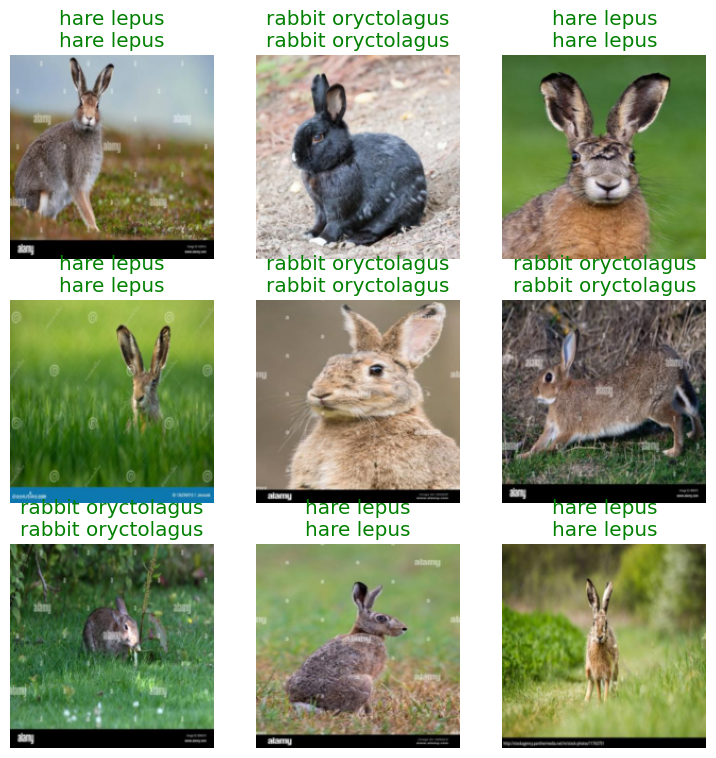

In [63]:
learner.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

In [ ]:
cleaner = ImageClassifierCleaner(learner)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,rabbit in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/rabbit)

In [ ]:
learner.export('model.pkl')

In [ ]:
learner.export('model.pkl')